In [ ]:
pip install qiskit

In [ ]:
pip list

In [ ]:
pip install qiskit[visualization]

In [7]:
from qiskit.visualization import array_to_latex
from qiskit.quantum_info import Statevector
import numpy as np

# Clase 1-2:

1-

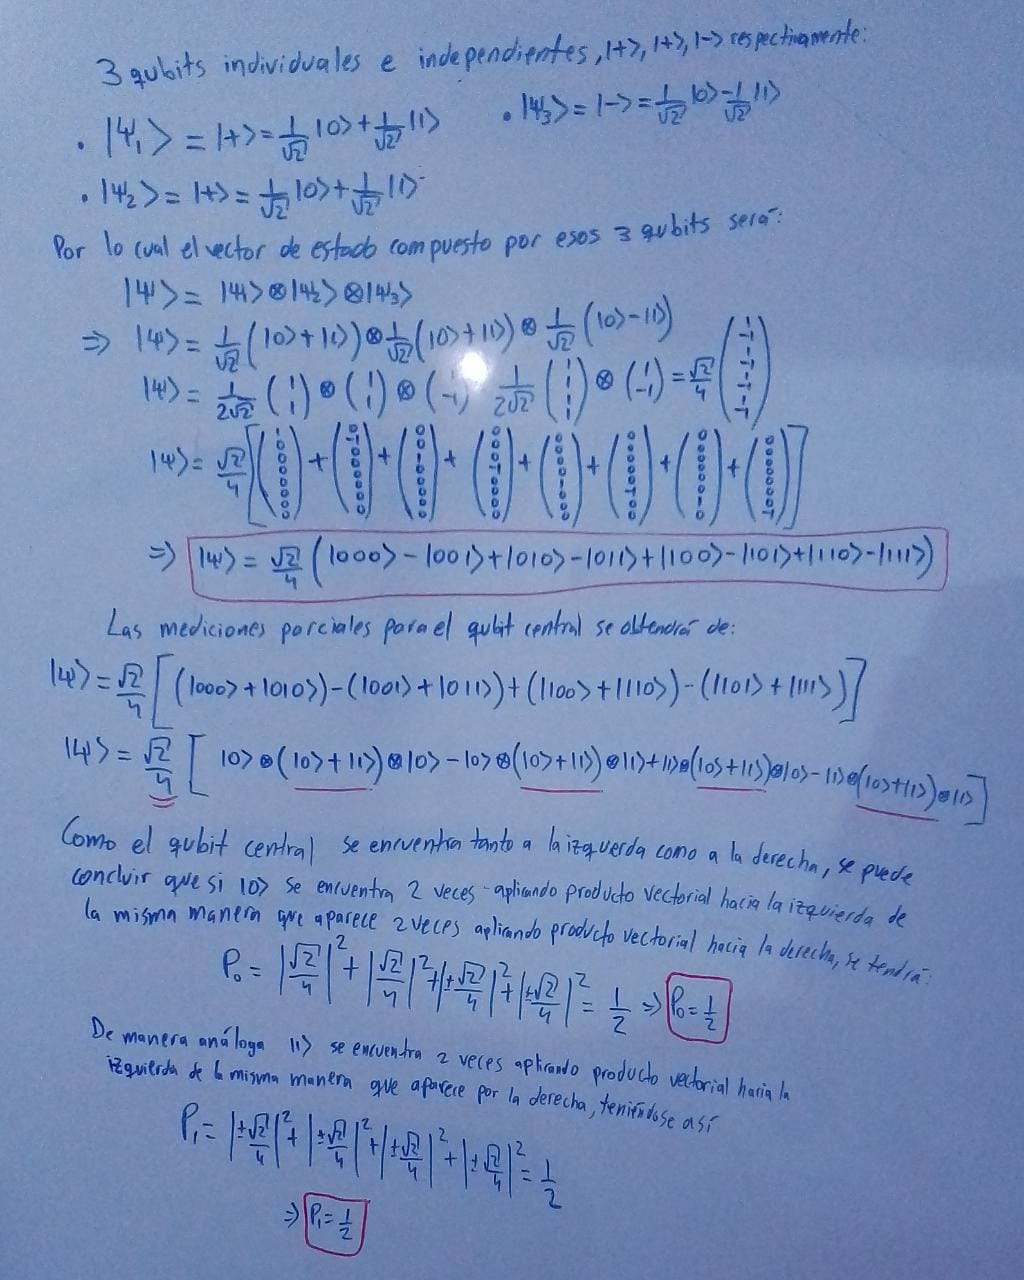

Ahora usando quisqit:

In [8]:
ket_plus_plus_moins = Statevector.from_label('++-')
ket_plus_plus_moins.draw('Latex')

<IPython.core.display.Latex object>

Verificando que está normalizado:

In [9]:
ket_plus_plus_moins.is_valid()

True

Mediciones parciales para el qubit central:

In [11]:
probs_ket_plus_plus_moins = ket_plus_plus_moins.probabilities_dict([1])
print('probs: {}'.format(probs_ket_plus_plus_moins))

probs: {'0': 0.4999999999999998, '1': 0.4999999999999998}


2.

El sistema mostrado tiene como mínimo 4 qubits independientes. Donde solo habrá 2 posibles combinaciones de qubits para dicho sistema.

El cual se puede corroborar tomando este sistema particular:

In [12]:
from qiskit.visualization import array_to_latex
from qiskit import QuantumCircuit
from qiskit.visualization import plot_state_qsphere
from qiskit.quantum_info import random_statevector, Statevector

In [13]:
ket = Statevector([0, 0, 1/np.sqrt(2), 0,0,0,0,0,0,0,0,0,0,1/np.sqrt(2),0,0])
ket.draw('Latex')

<IPython.core.display.Latex object>

In [14]:
ket.is_valid()

True

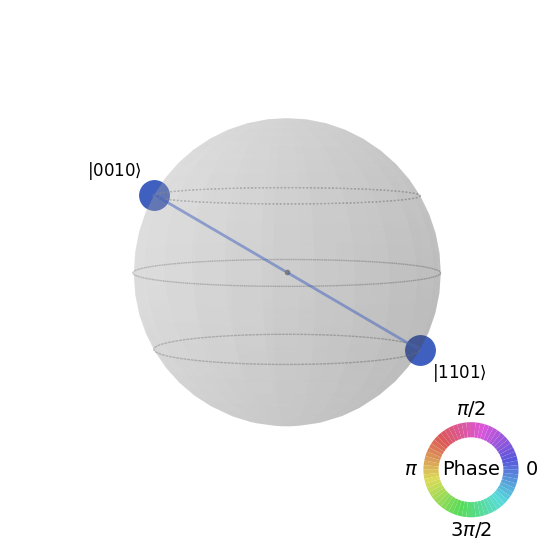

In [15]:
plot_state_qsphere(ket)

3.

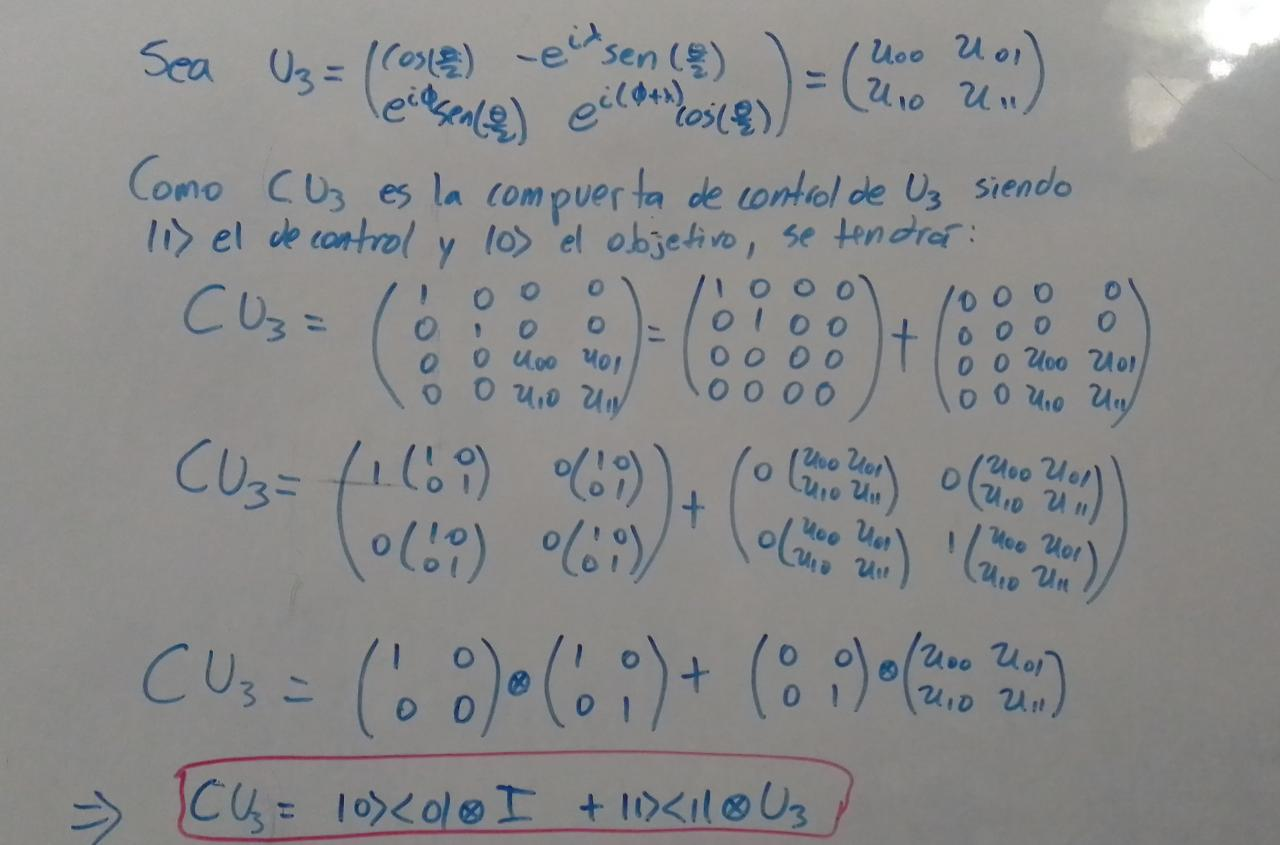

In [31]:
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.circuit.library import U3Gate
from numpy import pi


In [33]:
# Creando un circuito cuántico y un registro cuántico con 2 qubits
qr = QuantumRegister(2, 'q')
circuit = QuantumCircuit(qr)

# Definiendo los ángulos
theta = pi
phi = pi/2
lambda_val = 7*pi/2

# Creando la compuerta U3 con los parámetros dados
u3_gate = U3Gate(theta, phi, lambda_val)

# Aplicando la compuerta controlada-U3 a los qubits
circuit.append(u3_gate.control(), [qr[0], qr[1]])

# Visualizacion del circuito
print(circuit)

                       
q_0: ────────■─────────
     ┌───────┴────────┐
q_1: ┤ U3(π,π/2,7π/2) ├
     └────────────────┘


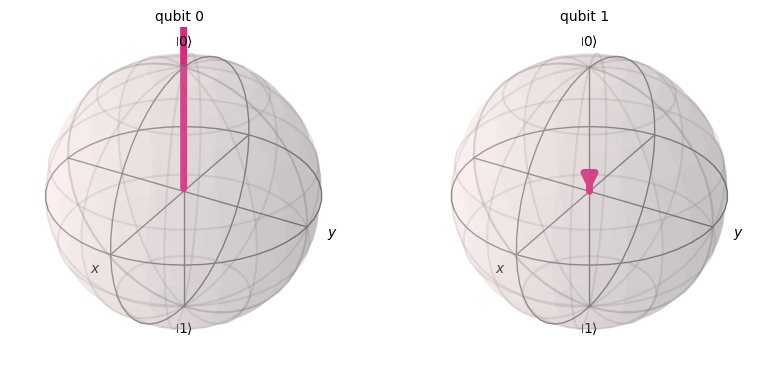

In [35]:
plot_bloch_multivector(u3_gate.control().to_matrix())

# Clase 4-5

4.

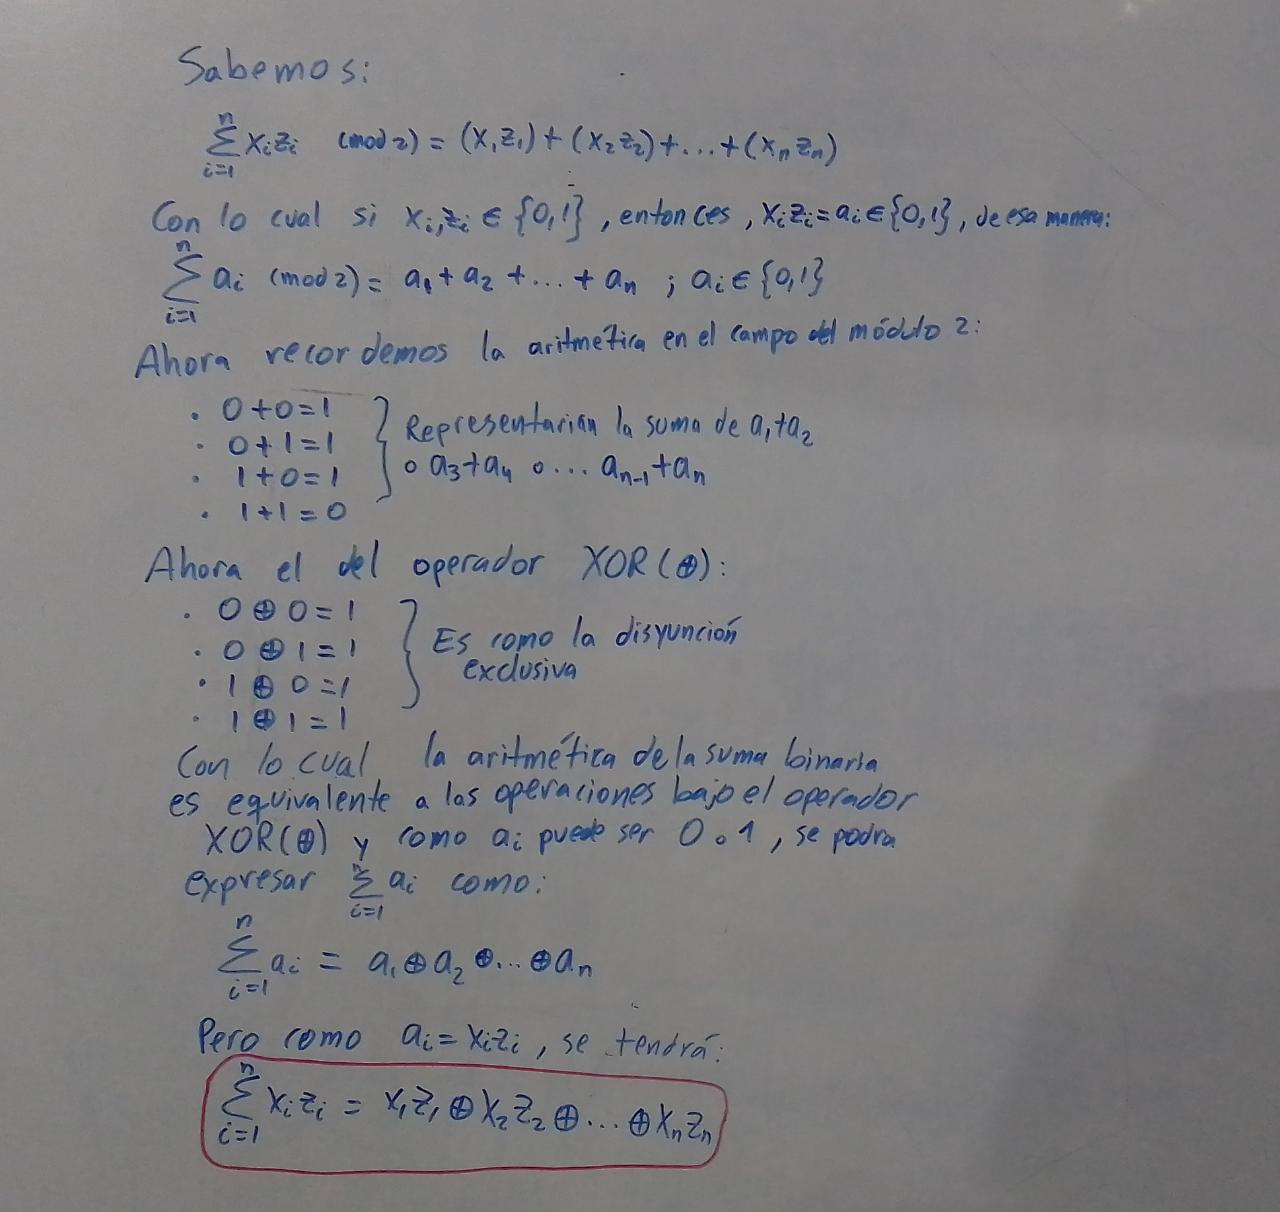

5.

In [36]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit.library import CXGate

# Crea un circuito cuántico y un registro cuántico con 3 qubits
qr = QuantumRegister(3, 'q')
cr = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(qr, cr)

# Implementa el oráculo balanceado
circuit.x(qr[0])  # Aplica una compuerta X al primer qubit
circuit.append(CXGate(), [qr[0], qr[2]])  # Aplica una compuerta CNOT controlado por el primer y tercer qubit
circuit.x(qr[0])  # Deshace la compuerta X en el primer qubit

# Mide el primer qubit en el registro clásico
circuit.measure(qr[0], cr[0])

# Visualiza el circuito
print(circuit)

     ┌───┐     ┌───┐┌─┐
q_0: ┤ X ├──■──┤ X ├┤M├
     └───┘  │  └───┘└╥┘
q_1: ───────┼────────╫─
          ┌─┴─┐      ║ 
q_2: ─────┤ X ├──────╫─
          └───┘      ║ 
c: 1/════════════════╩═
                     0 


7.

In [ ]:
pip install qiskit-aer

{'000': 137, '010': 114, '001': 117, '100': 526, '011': 130}


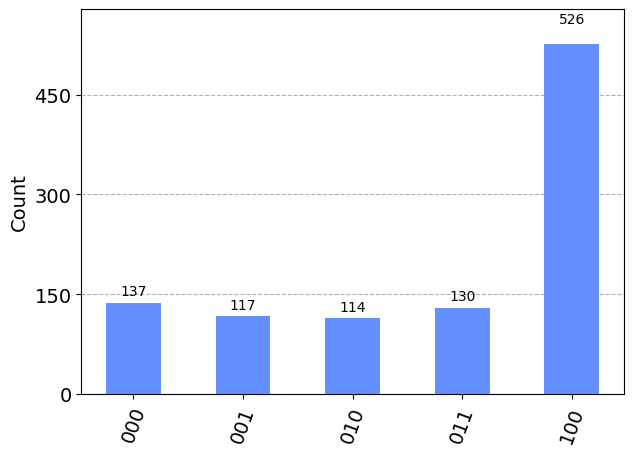

In [40]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram
import numpy as np

# Crea un circuito cuántico con 3 qubits
n = 3
qr = QuantumRegister(n)
circuit = QuantumCircuit(qr)

# Definimos la máxima cantidad de aristas (6 en este caso)
max_edges = 6

# Implementacion del oráculo que busca la máxima cantidad de aristas
circuit.x(qr)  # Inicializa todos los qubits en el estado |1⟩
circuit.h(qr)  # Aplica una compuerta Hadamard a todos los qubits

# Implementacion del oráculo que marca el estado con la cantidad máxima de aristas (6)
circuit.x(qr[0])  # Marca el estado |000⟩ como el estado con 6 aristas
circuit.mct(qr[:-1], qr[-1])  # Compuerta Toffoli controlada por los primeros dos qubits

# Implementacion el operador difusor
circuit.h(qr)
circuit.x(qr)

# Implementacion el oráculo inverso
circuit.mct(qr[:-1], qr[-1])  # Compuerta Toffoli controlada por los primeros dos qubits
circuit.x(qr[0])  # Desmarca el estado |000⟩
circuit.h(qr)

# Medimos los qubits
circuit.measure_all()

# Simulacion del circuito
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator, shots=1024)
result = job.result()
counts = result.get_counts(circuit)

# Visualizacion de los resultados
print(counts)
plot_histogram(counts)

Extra 1:

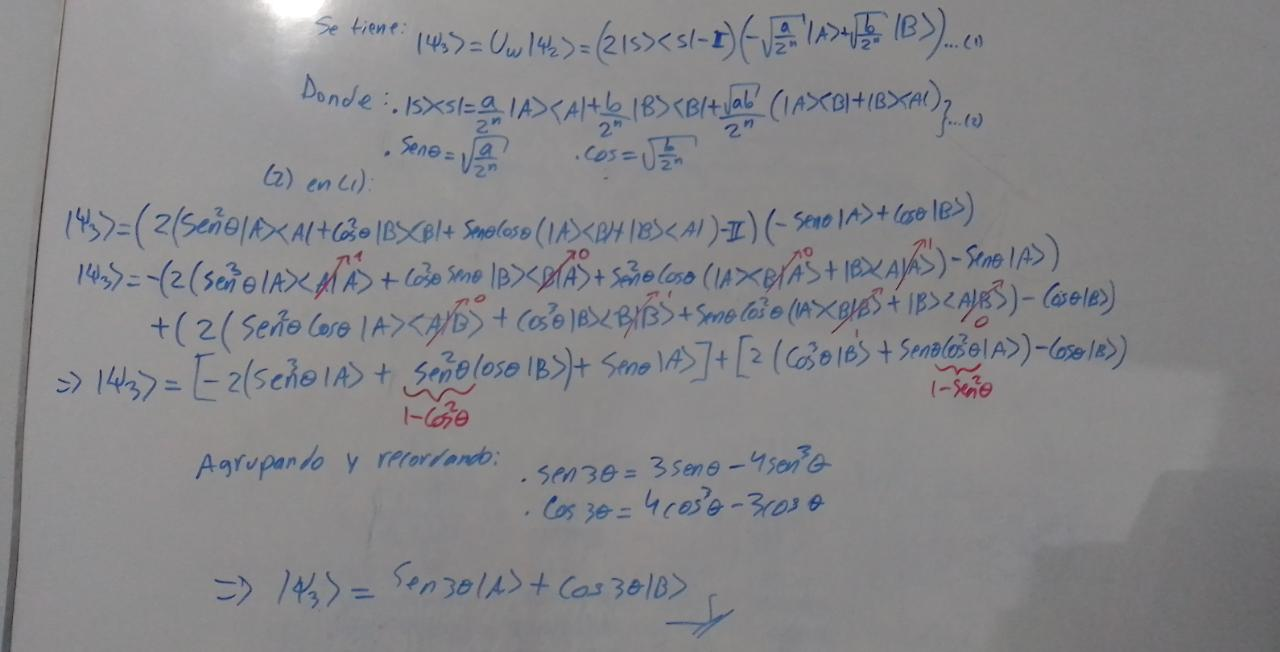